In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier, plot_importance
from sklearn.decomposition import PCA
import shap

In [ ]:
data = pd.read_csv(r'D:\pycharmproject\kaggle\credit\data\BankChurners.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
data = data.drop(columns=['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'])

In [4]:
obj_col = [i for i in data.columns if data[i].dtype == 'object']
label_data = data.copy()
ordinal_encoder = OrdinalEncoder()
label_data[obj_col] = ordinal_encoder.fit_transform(data[obj_col])

label_data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1.0,45,1.0,3,3.0,1.0,2.0,0.0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1.0,49,0.0,5,2.0,2.0,4.0,0.0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1.0,51,1.0,3,2.0,1.0,3.0,0.0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1.0,40,0.0,4,3.0,3.0,4.0,0.0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1.0,40,1.0,3,5.0,1.0,2.0,0.0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
oversample = SMOTE()
X, y = oversample.fit_resample(label_data[label_data.columns[1:]], label_data[label_data.columns[0]])
usampled_df = X.assign(Churn = y)

In [6]:
usampled_df

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn
0,45,1.000000,3,3.000000,1.000000,2.000000,0.0,39,5,1,3,12691.000000,777,11914.000000,1.335000,1144,42,1.625000,0.061000,1.0
1,49,0.000000,5,2.000000,2.000000,4.000000,0.0,44,6,1,2,8256.000000,864,7392.000000,1.541000,1291,33,3.714000,0.105000,1.0
2,51,1.000000,3,2.000000,1.000000,3.000000,0.0,36,4,1,0,3418.000000,0,3418.000000,2.594000,1887,20,2.333000,0.000000,1.0
3,40,0.000000,4,3.000000,3.000000,4.000000,0.0,34,3,4,1,3313.000000,2517,796.000000,1.405000,1171,20,2.333000,0.760000,1.0
4,40,1.000000,3,5.000000,1.000000,2.000000,0.0,21,5,1,0,4716.000000,0,4716.000000,2.175000,816,28,2.500000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,35,0.768006,0,2.000000,1.000000,1.695981,0.0,26,5,2,4,4049.544375,0,4049.544375,0.803839,7360,71,0.697720,0.000000,0.0
16996,48,0.000000,1,6.000000,1.000000,2.181314,0.0,32,3,2,3,2782.626272,0,2782.626272,0.481841,2087,43,0.431875,0.000000,0.0
16997,40,0.000000,1,3.480192,1.000000,2.519808,0.0,32,4,3,3,1438.300000,0,1438.300000,0.625922,2127,42,0.574894,0.000000,0.0
16998,45,1.000000,2,2.523773,1.000000,1.428682,3.0,32,4,2,1,34516.000000,601,33914.127179,0.673615,2072,46,0.620913,0.017715,0.0


In [8]:
target = 'Churn'

# 分离特征和目标变量
X = usampled_df.drop('Churn', axis=1)
y = usampled_df[target]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

c:\Users\79250\.conda\envs\kaggle\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


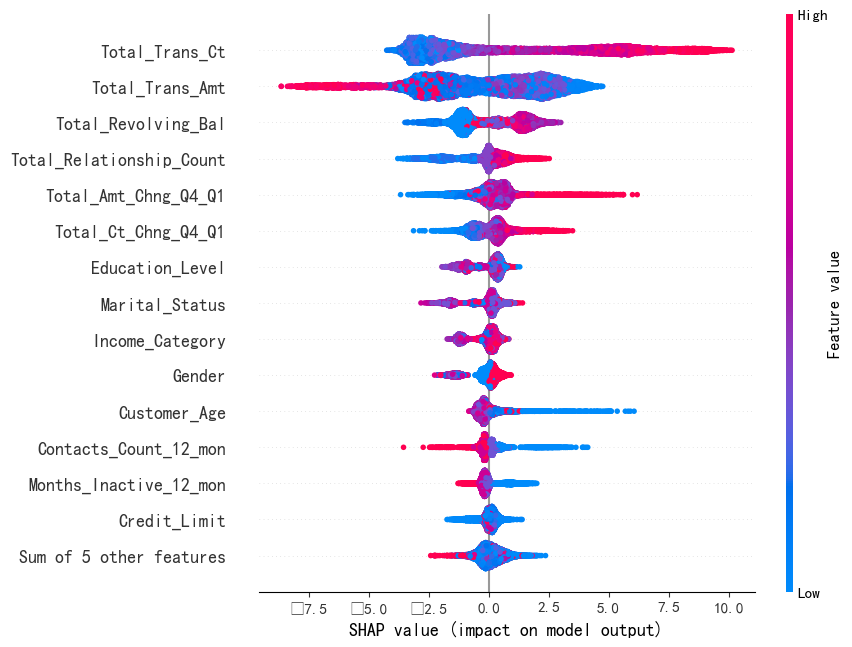

<Figure size 640x480 with 0 Axes>

In [ ]:
explainer = shap.TreeExplainer(xgb_model)
explanation = explainer(X)
shap.plots.beeswarm(explanation, max_display=15)
shap.sa

交易的重要性而言
- 平均而言过去12个月的交易数量式最重要的特征，其次是交易总额
单个特征的影响方向而言
- 高交易次数主要分布在右侧，表示交易次数越多，越容易流失
- 总交易金额,分布较为分散，表明其影响较为复杂高交易金额（红点）在两端都有分布，说明极高或极低的交易金额都可能影响客户流失
- 高循环额度会增加流是风险

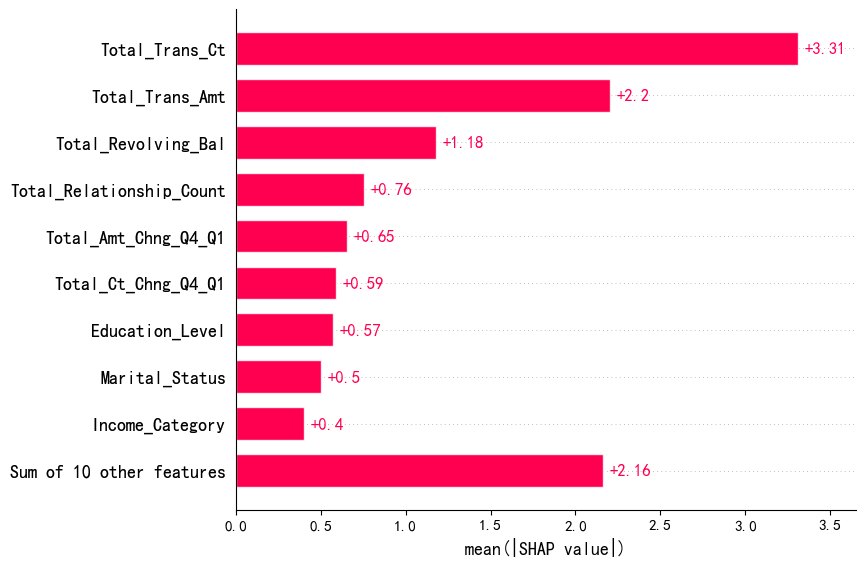

In [12]:
shap.plots.bar(explanation)

<Figure size 1000x600 with 0 Axes>

c:\Users\79250\.conda\envs\kaggle\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


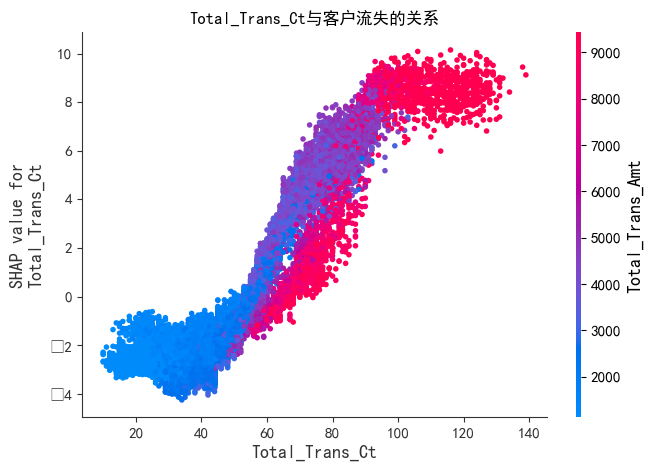

<Figure size 1000x600 with 0 Axes>

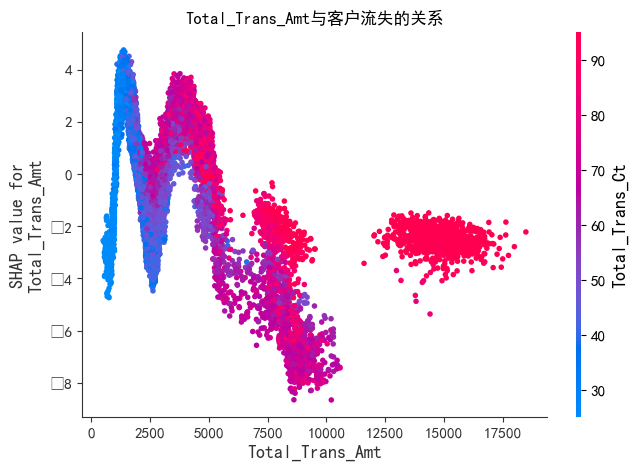

<Figure size 1000x600 with 0 Axes>

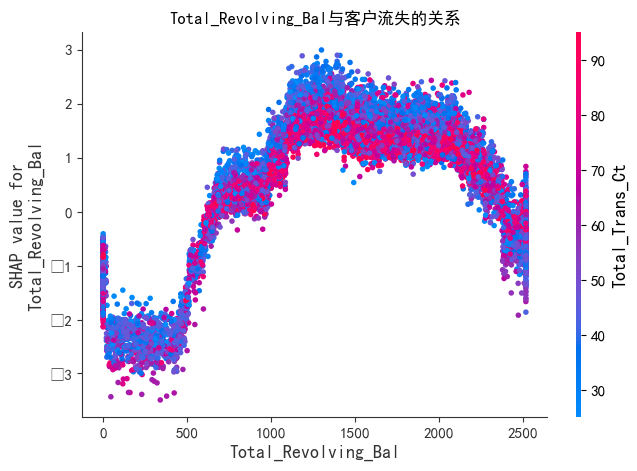

In [15]:
for feature in ['Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Revolving_Bal']:
    plt.figure(figsize=(10, 6))
    shap.dependence_plot(feature, explanation.values, X, show=False)
    plt.title(f'{feature}与客户流失的关系')
    plt.show()

## 图1
整体趋势：

图像呈现明显的S形曲线
交易次数与流失风险呈现非线性关系
关键拐点：

在40-60次交易区间有一个明显的转折点
交易次数超过80次后，流失风险显著增加
交互效应：

同样的交易次数下，高交易金额(红点)的客户通常有更高的SHAP值
表明高频高额交易的客户更容易流失

## 图2
多段式关系

低额交易（<2500）：SHAP值波动较大
中额交易（2500-7500）：SHAP值呈现下降趋势
高额交易（>7500）：SHAP值趋于稳定，略有上升
明显的交互效应

高交易次数（红点）通常对应较高的SHAP值
低交易次数（蓝点）通常对应较低的SHAP值

## 图3
复杂的U形关系

低循环余额（<500）：SHAP值较低，流失风险小
中等循环余额（1000-2000）：SHAP值较高，流失风险大
高循环余额（>2000）：SHAP值又开始下降
交互效应

蓝点（低交易次数）和红点（高交易次数）的分布较为混合
说明循环余额的影响相对独立于交易次数


# 建议
循环余额管理

关注中等循环余额客户（1000-2000区间）
为高风险区间客户提供合理的信用额度管理建议
交易金额策略

对高频高额交易客户提供个性化服务
关注交易金额在2500-7500区间的客户，这是流失风险变化最大的区间